# About this data set
This is a very extensive dataset on Energy by Our World in Data
This dataset is a collection of key metrics maintained by Our World in Data. It is updated regularly and includes data on energy consumption (primary energy, per capita, and growth rates), energy mix, electricity mix and other relevant metrics.
You can learn more about this dataset in the below link:
https://www.kaggle.com/pralabhpoudel/world-energy-consumption

The reason that I chose this dataset to carryout the project is :
* It has categorical data columns which would be useful in data visualization .
* It has numerical data columns which would be useful for simple statistical applications.
* It's a very interesting dataset where we can apply several analytical questions and get valuable insights


# 1.Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 2.Importing the dataFrame
This data set has 122 many columns , I'm only intressted in the below 25 columns for this project(fOR The discription of each column please check the dataset link):
* country
* year
* carbonintensityelec
* coal_production
* electricity_generation
*  biofuel_electricity
* coal_electricity
* fossil_electricity
* gas_electricity
* hydro_electricity
* nuclear_electricity
* oil_electricity
* renewables_electricity
* solar_electricity
* wind_electricity
* energypergdp
* energypercapita
* fossilshareelec
* gasshareelec
* gas_production
* lowcarbonshare_elec
* oil_production
* population
* gdp
*


In [2]:
#import DataFrame
DF = pd.read_csv('World Energy Consumption.csv')
#Filter on needed columns
DF=DF[['country','year','coal_production','electricity_generation','biofuel_electricity','coal_electricity','fossil_electricity','gas_electricity','hydro_electricity','nuclear_electricity','oil_electricity','renewables_electricity','oil_production','population','gdp','solar_electricity','wind_electricity','energy_per_gdp','energy_per_capita','fossil_share_elec','gas_share_elec','gas_production','low_carbon_share_elec']]
#Filter on year >=1985
DF=DF[DF['year']>=1990]
#Filter on countries 
Countries=['Egypt','Saudi Arabia','United Kingdom','France','Germany','United States','Japan','India']
#filter columns
DF=DF.loc[DF['country'].isin(Countries)]

DF.head(3)


,country,year,coal_production,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,...,population,gdp,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_share_elec,gas_share_elec,gas_production,low_carbon_share_elec
4951,Egypt,1990,NaN,41.952,NaN,0.0,32.000,16.446,9.953,0.0,...,56134000.0,2.530000e+11,0.0,0.0,1.560,7031.142,76.276,39.201,77.674,23.724
4952,Egypt,1991,NaN,43.276,NaN,0.0,33.360,20.406,9.916,0.0,...,57425000.0,2.610000e+11,0.0,0.0,1.532,6962.011,77.087,47.154,87.395,22.913
4953,Egypt,1992,NaN,44.987,NaN,0.0,35.187,22.944,9.800,0.0,...,58667000.0,2.690000e+11,0.0,0.0,1.484,6805.716,78.216,51.003,94.518,21.784


# 3.Cleaning the data

In [3]:

#looks like we have a lot of empty Values
nulls=DF.isna().sum()
nulls


country                    0
year                       0
coal_production           96
electricity_generation     0
biofuel_electricity       80
coal_electricity          10
fossil_electricity        10
gas_electricity           10
hydro_electricity          0
nuclear_electricity        0
oil_electricity           10
renewables_electricity     0
oil_production            96
population                 6
gdp                       30
solar_electricity          0
wind_electricity           0
energy_per_gdp            30
energy_per_capita          6
fossil_share_elec         10
gas_share_elec            10
gas_production            66
low_carbon_share_elec      0
dtype: int64

In [4]:
#For Items like GDP  it doesnt make sense to replace the null values with a 0 ,so let's try FWD fill and then backwards fill
#looks like we have a lot of empty Values
nulls=DF.isna().sum()
for i in nulls.index:
    if nulls[i]>0:
        DF[i].ffill(inplace=True)
        DF[i].bfill(inplace=True)
DF.isna().sum()

country                   0
year                      0
coal_production           0
electricity_generation    0
biofuel_electricity       0
coal_electricity          0
fossil_electricity        0
gas_electricity           0
hydro_electricity         0
nuclear_electricity       0
oil_electricity           0
renewables_electricity    0
oil_production            0
population                0
gdp                       0
solar_electricity         0
wind_electricity          0
energy_per_gdp            0
energy_per_capita         0
fossil_share_elec         0
gas_share_elec            0
gas_production            0
low_carbon_share_elec     0
dtype: int64

# 4.Selecting the color scheme

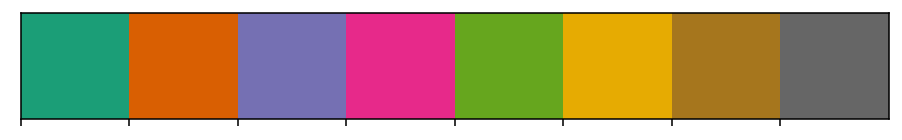

In [5]:
palette="Dark2"
sns.set_palette(palette)
sns.palplot(sns.color_palette(palette))
plt.show()

# GDP Vs Population Trends

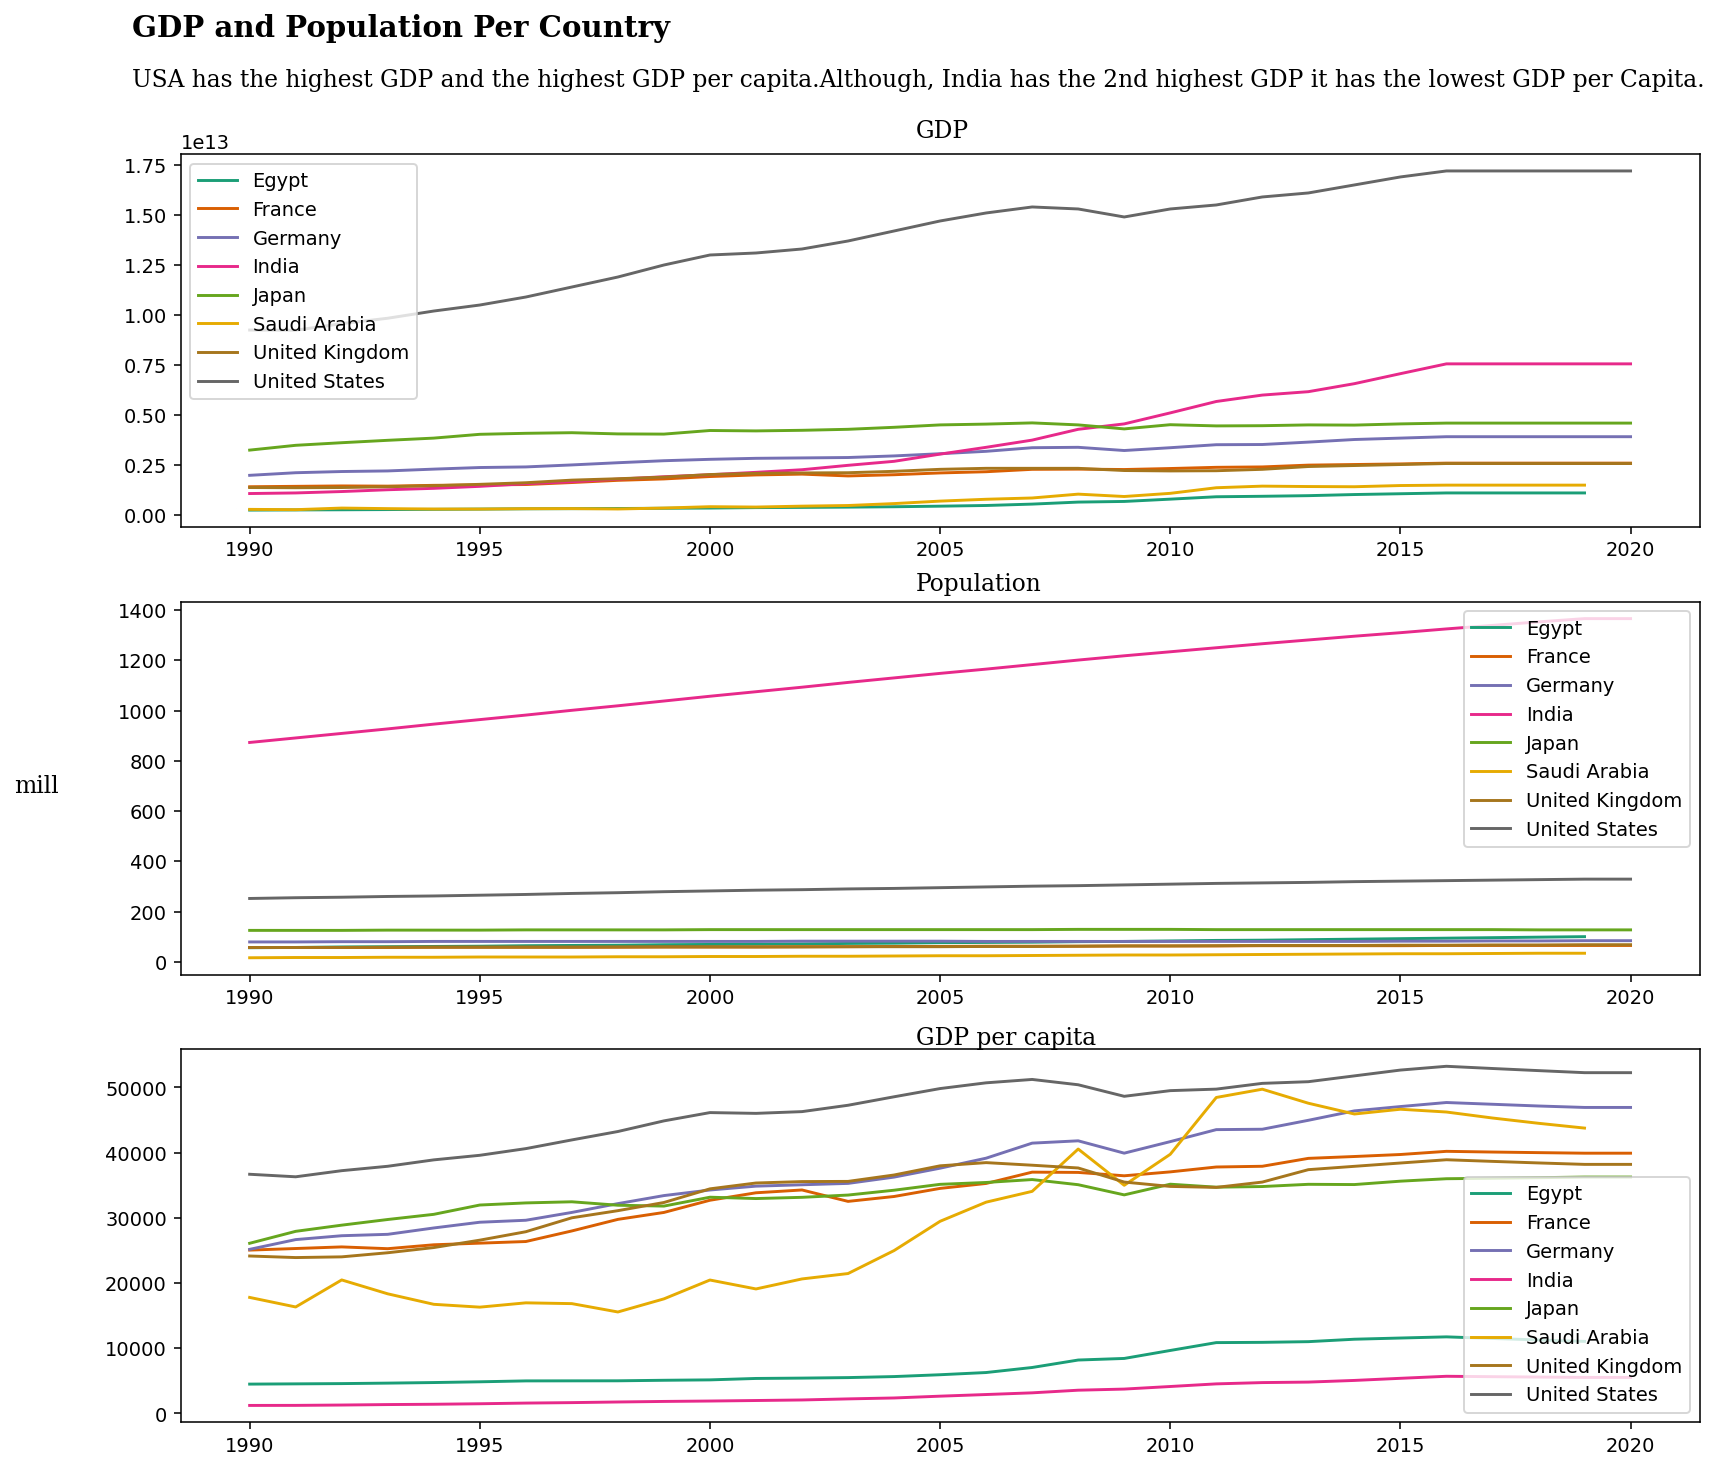

In [6]:
# lets plot the gdp , population and gdp per capita  per country
DF_gdp=DF.groupby(['year','country'])['gdp'].sum().unstack('country')
DF_pop=DF.groupby(['year','country'])['population'].sum().unstack('country')
DF_pop_mil=round(DF_pop/1000000)
DF['gdp_per_capita']=round(DF['gdp']/DF['population'])
DF_gdp_per_capita=DF.groupby(['year','country'])['gdp_per_capita'].sum().unstack('country')
fig, ax = plt.subplots(3, 1, figsize=(14, 12))
ax[0].plot(DF_gdp,label=DF_gdp.columns)
ax[0].legend()
ax[1].plot(DF_pop_mil,label=DF_pop_mil.columns)
ax[1].legend()
ax[2].plot(DF_gdp_per_capita,label=DF_gdp_per_capita.columns)
ax[2].legend()
fig.text(0.1, 0.95, 'GDP and Population Per Country', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.1, 0.92, 
'''USA has the highest GDP and the highest GDP per capita.Although, India has the 2nd highest GDP it has the lowest GDP per Capita.'''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.04, 0.5, 
'''mill'''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.5, 0.89, 
'''GDP'''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.5, 0.62,
'''Population'''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.5, 0.35,
'''GDP per capita'''
, fontsize=12, fontweight='light', fontfamily='serif')
plt.show()

# Slicing through the years for 2000-2005 VS 2010-2015.
%Changes in GDP ,Population and GDP per Capita

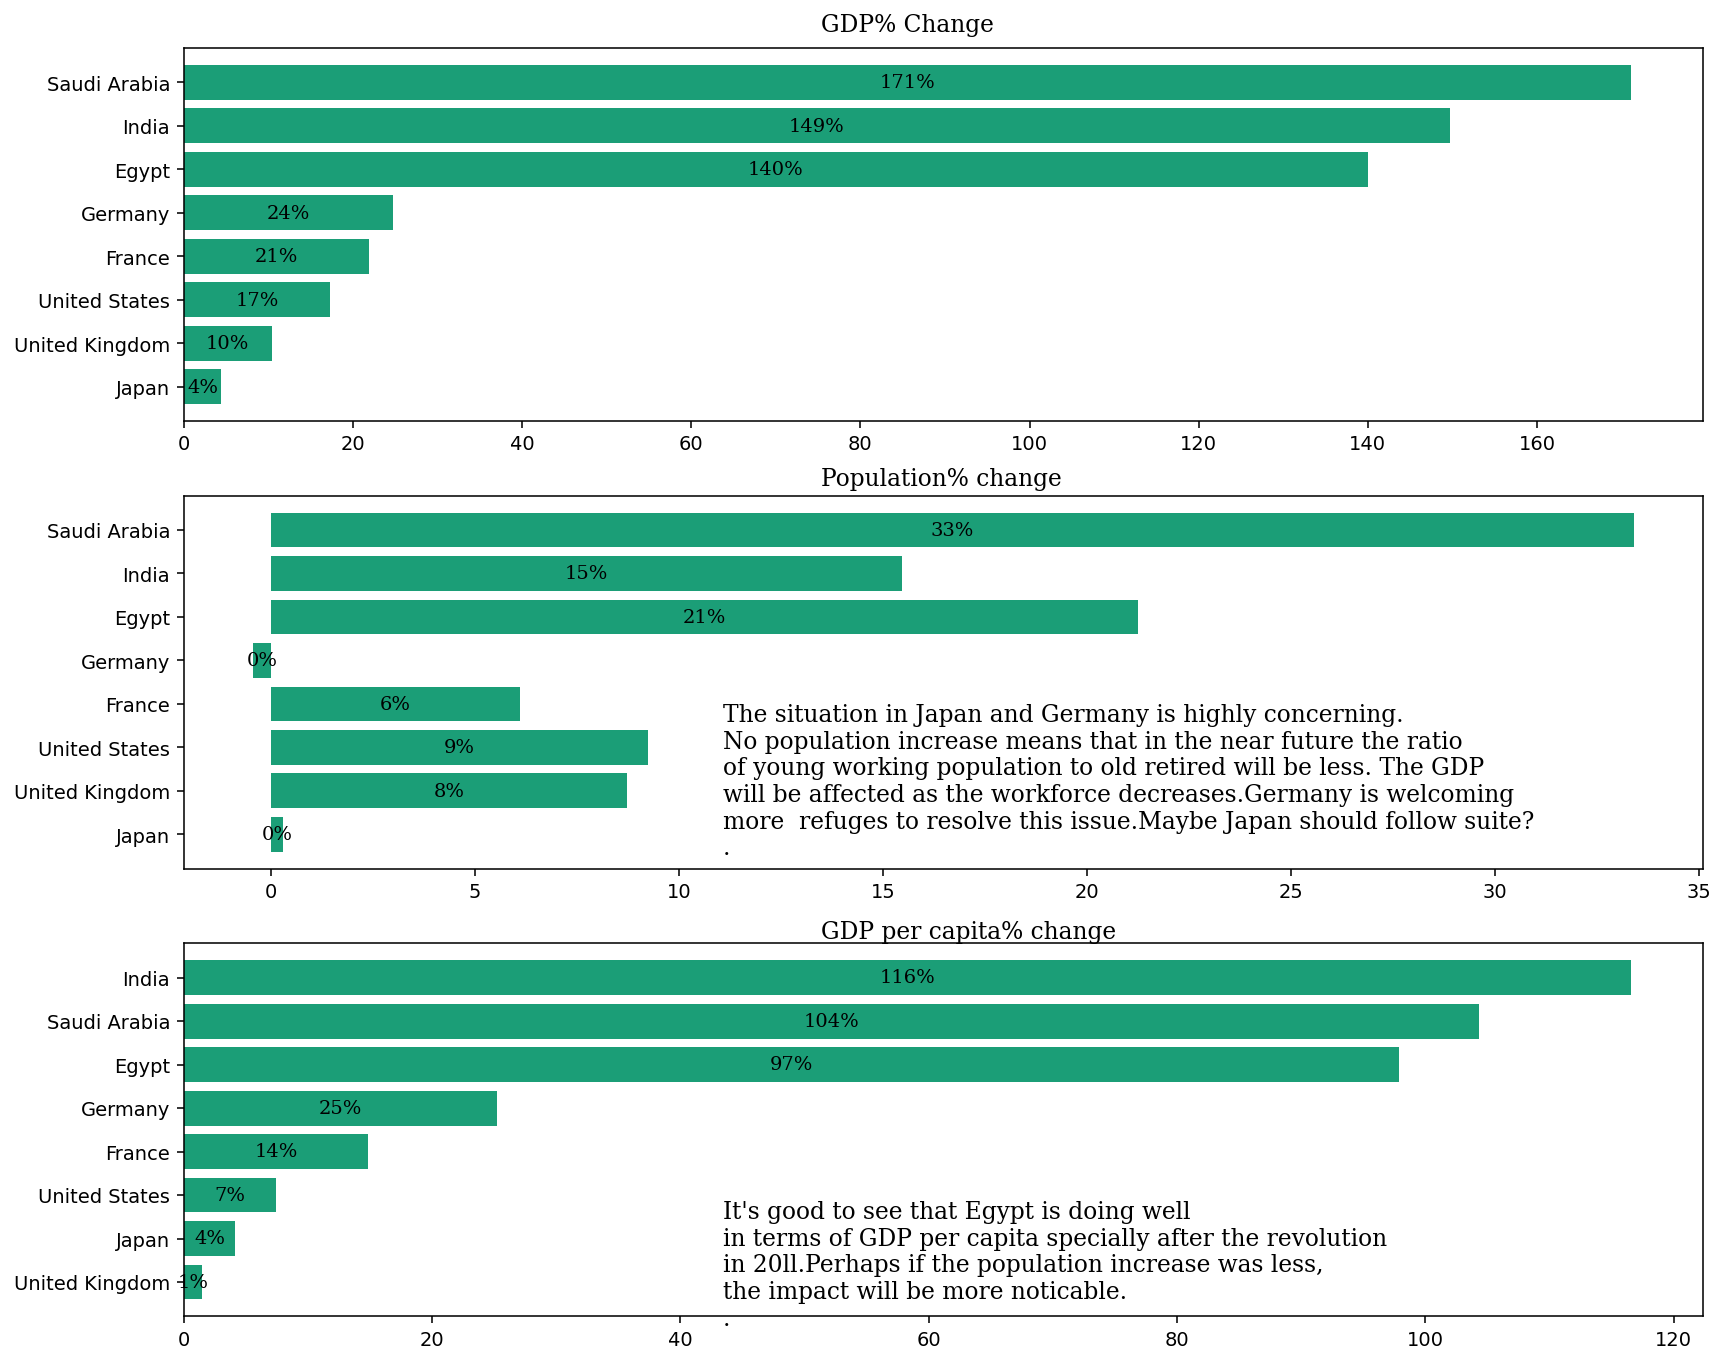

In [7]:
#We will create a comparision between the cannges in gdp and population per country in the 
#durations 2000-2005 and 2010-2015 
#gdp %increase
DF_comparision =pd.DataFrame()
DF_comparision['DF_2000_2005_gdp']=DF[(DF['year']>=2000) & (DF['year']<=2005)].groupby('country')['gdp'].mean()
DF_comparision['DF_2010_2015_gdp']=DF[(DF['year']>=2010) & (DF['year']<=2015)].groupby('country')['gdp'].mean()
DF_comparision['gdp_diffrence%']=100*(DF_comparision['DF_2010_2015_gdp']-DF_comparision['DF_2000_2005_gdp'])/DF_comparision['DF_2000_2005_gdp']
DF_comparision.sort_values('gdp_diffrence%',ascending=True,inplace=True)
fig, ax = plt.subplots(3, 1, figsize=(14, 12))
ax[0].barh(DF_comparision.index,DF_comparision['gdp_diffrence%'])
for i in DF_comparision.index:
    ax[0].annotate(f"{int(DF_comparision['gdp_diffrence%'][i])}%", 
                   xy=(DF_comparision['gdp_diffrence%'][i]/2, i),
                   va = 'center', ha='center',fontsize=10, fontweight='light', fontfamily='serif',
                   color='black')
#pop %increase
DF_comparision['DF_2000_2005_pop']=DF[(DF['year']>=2000) & (DF['year']<=2005)].groupby('country')['population'].mean()
DF_comparision['DF_2010_2015_pop']=DF[(DF['year']>=2010) & (DF['year']<=2015)].groupby('country')['population'].mean()
DF_comparision['pop_diffrence%']=100*(DF_comparision['DF_2010_2015_pop']-DF_comparision['DF_2000_2005_pop'])/DF_comparision['DF_2000_2005_pop']
DF_comparision.sort_values('gdp_diffrence%',ascending=True,inplace=True)
DF_comparision.head()
ax[1].barh(DF_comparision.index,DF_comparision['pop_diffrence%'])
for i in DF_comparision.index:
    ax[1].annotate(f"{int(DF_comparision['pop_diffrence%'][i])}%", 
                   xy=(DF_comparision['pop_diffrence%'][i]/2, i),
                   va = 'center', ha='center',fontsize=10, fontweight='light', fontfamily='serif',
                   color='black')
#gdp per Capita
DF_comparision['DF_2000_2005_gpercapita']=DF[(DF['year']>=2000) & (DF['year']<=2005)].groupby('country')['gdp_per_capita'].mean()
DF_comparision['DF_2010_2015_gpercapita']=DF[(DF['year']>=2010) & (DF['year']<=2015)].groupby('country')['gdp_per_capita'].mean()
DF_comparision['gpercapita_diffrence%']=100*(DF_comparision['DF_2010_2015_gpercapita']-DF_comparision['DF_2000_2005_gpercapita'])/DF_comparision['DF_2000_2005_gpercapita']
DF_comparision.sort_values('gpercapita_diffrence%',ascending=True,inplace=True)
ax[2].barh(DF_comparision.index,DF_comparision['gpercapita_diffrence%'])
for i in DF_comparision.index:
    ax[2].annotate(f"{int(DF_comparision['gpercapita_diffrence%'][i])}%", 
                   xy=(DF_comparision['gpercapita_diffrence%'][i]/2, i),
                   va = 'center', ha='center',fontsize=10, fontweight='light', fontfamily='serif',
                   color='black')
fig.text(0.45, 0.89, 
'''GDP% Change'''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.45, 0.62,
'''Population% change '''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.45, 0.35,
'''GDP per capita% change'''
, fontsize=12, fontweight='light', fontfamily='serif')

fig.text(0.4, 0.4, 
'''The situation in Japan and Germany is highly concerning.
No population increase means that in the near future the ratio
of young working population to old retired will be less. The GDP
will be affected as the workforce decreases.Germany is welcoming 
more  refuges to resolve this issue.Maybe Japan should follow suite?
.'''
, fontsize=12, fontweight='light', fontfamily='serif')

fig.text(0.4, 0.12, 
'''It's good to see that Egypt is doing well
in terms of GDP per capita specially after the revolution 
in 20ll.Perhaps if the population increase was less,
the impact will be more noticable.
.'''
, fontsize=12, fontweight='light', fontfamily='serif')
    
plt.show()

# Electricty source distribution in Japan

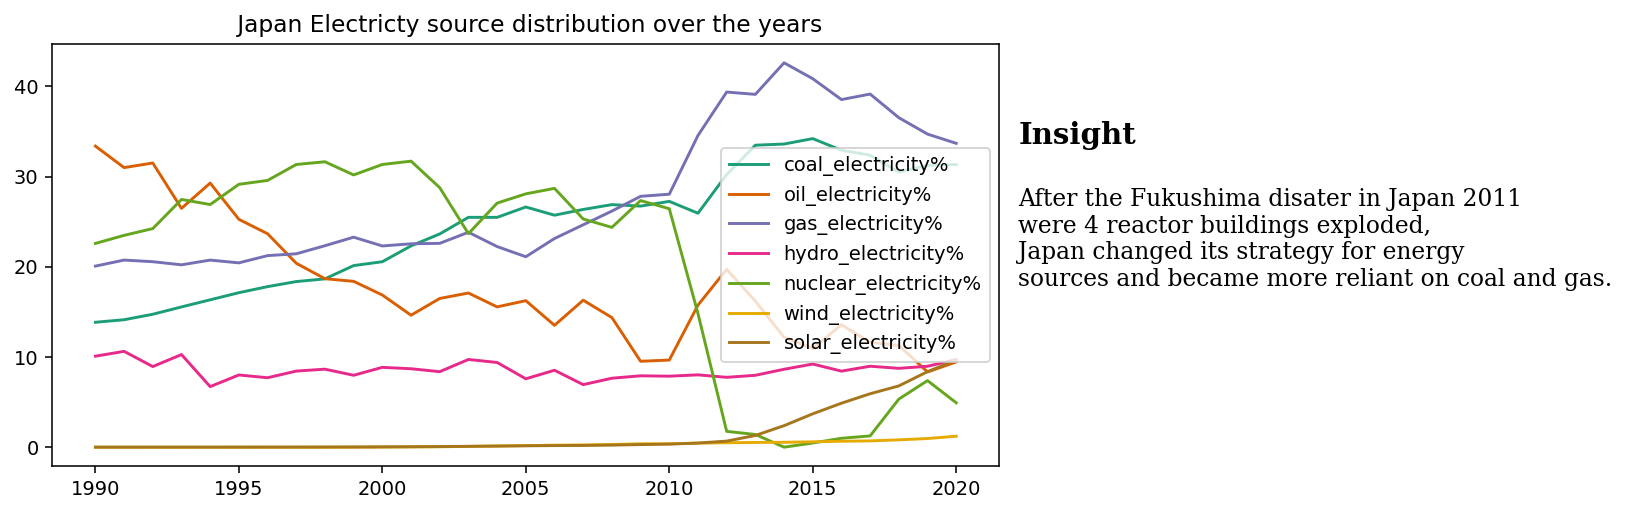

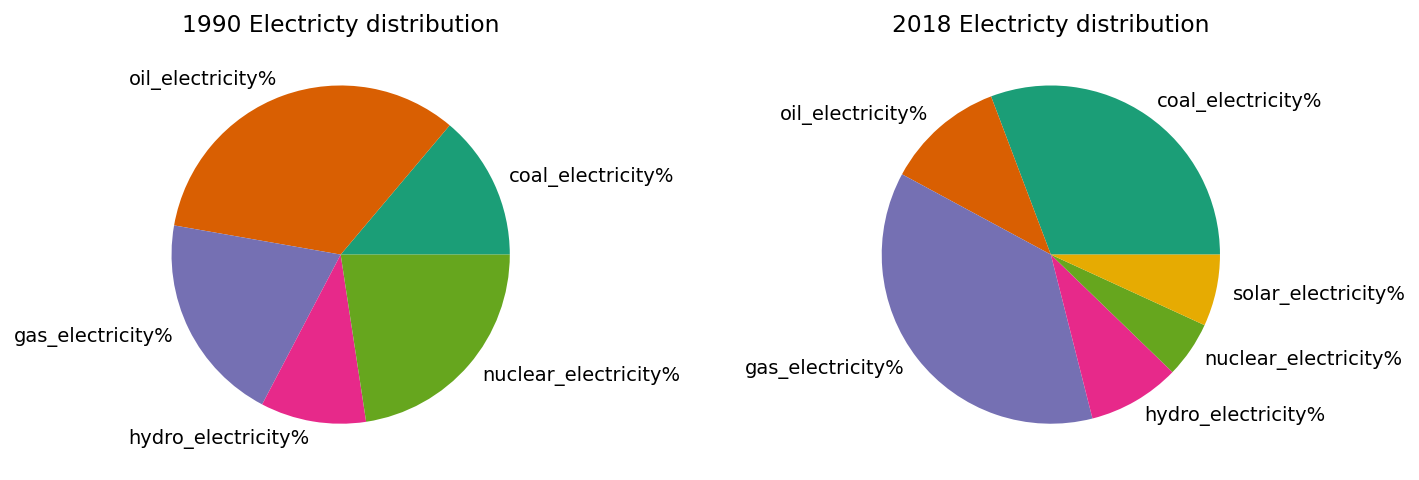

In [8]:

# get the % share of electricty from total energy sources 
Parse=['coal_electricity','oil_electricity','gas_electricity','hydro_electricity','nuclear_electricity','wind_electricity','solar_electricity']
DF['total']=DF[Parse].sum(axis=1)
DF_Electricity=DF[['year','country']]
for i in Parse:
    DF_Electricity[f"{i}%"]=round(100*(DF[i]/DF['total']),4)
# plot the change in the percentage over the years
fig, ax = plt.subplots(1, 2, figsize=(12, 4),gridspec_kw={'width_ratios':[4,1]})
chart_DF=DF_Electricity[DF_Electricity['country']=='Japan'].groupby('year').mean()
ax[0].plot(chart_DF,label=chart_DF.columns)
ax[0].set_title(" Japan Electricty source distribution over the years")
ax[0].legend()
ax[1].axis('off')
fig.text(0.7, 0.7, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.7, 0.4, '''
After the Fukushima disater in Japan 2011
were 4 reactor buildings exploded,
Japan changed its strategy for energy
sources and became more reliant on coal and gas.
''' , fontsize=12, fontweight='light', fontfamily='serif')
    

#plot the pie charts for energy distribution and compare 1990 Vs 2018
#but for the pie charts its better to drop the columns with zero values to not affect the labeling
years=[1990,2018]
count=0
fig2,ay =  plt.subplots(1, 2, figsize=(12, 4))
for y in years:
    chart_DF_pie_1=chart_DF[(chart_DF.index.values==y)]
    for i in chart_DF_pie_1.columns:
        if chart_DF_pie_1.iloc[0][i]<1:
            chart_DF_pie_1.drop(columns=[i],axis=1,inplace=True)
    ay[count].pie(chart_DF_pie_1.iloc[0].values,labels=chart_DF_pie_1.columns)
    ay[count].set_title(f"{int(y)} Electricty distribution")
    count=count+1

plt.show()





# Electricty source distribution in Gemany

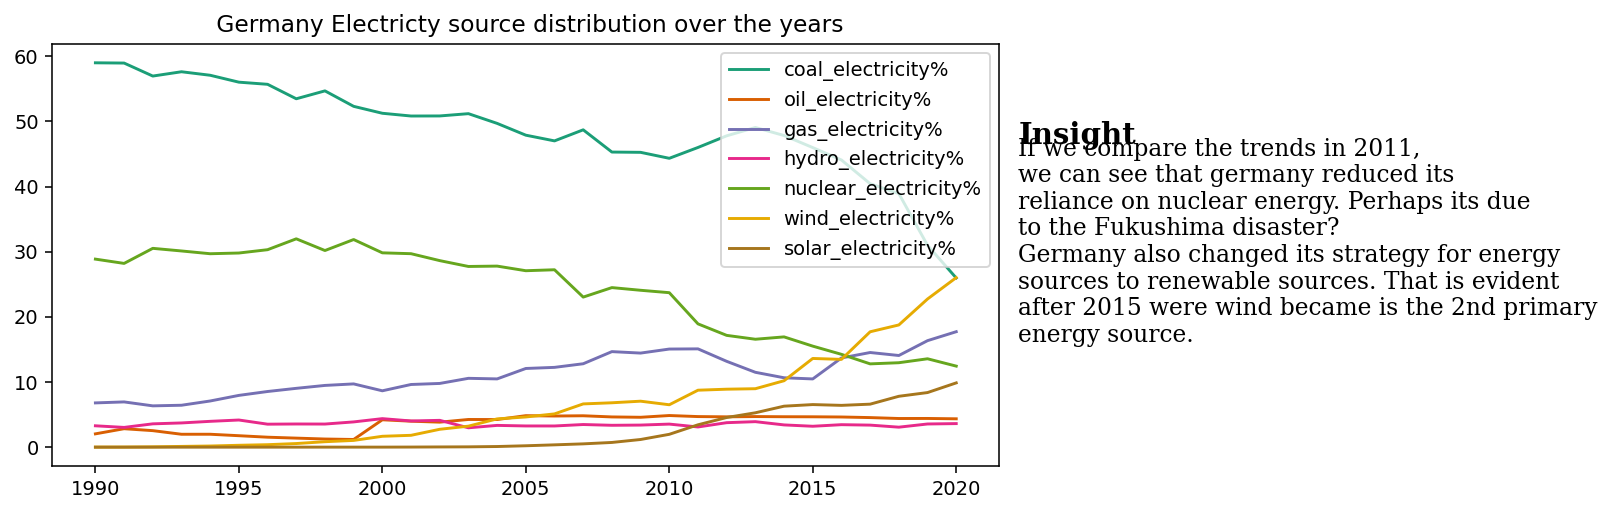

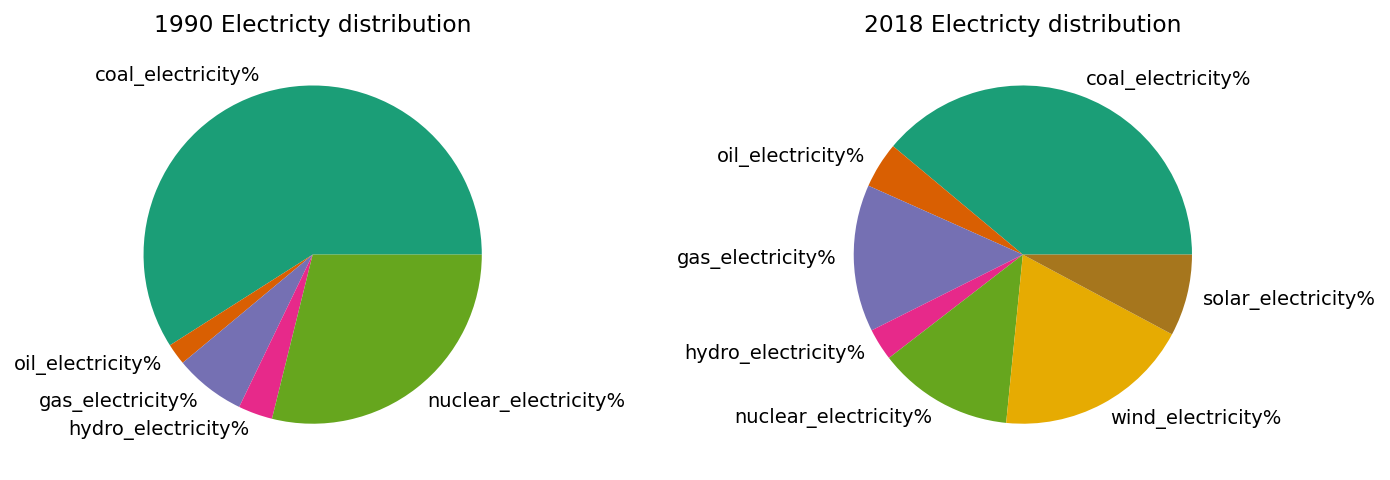

In [9]:

# get the % share of electricty from total energy sources 
Parse=['coal_electricity','oil_electricity','gas_electricity','hydro_electricity','nuclear_electricity','wind_electricity','solar_electricity']
DF['total']=DF[Parse].sum(axis=1)
DF_Electricity=DF[['year','country']]
for i in Parse:
    DF_Electricity[f"{i}%"]=round(100*(DF[i]/DF['total']),4)
# plot the change in the percentage over the years
fig3, ax3 = plt.subplots(1, 2, figsize=(12, 4),gridspec_kw={'width_ratios':[4,1]})
chart_DF=DF_Electricity[DF_Electricity['country']=='Germany'].groupby('year').mean()
ax3[0].plot(chart_DF,label=chart_DF.columns)
ax3[0].set_title(" Germany Electricty source distribution over the years")
ax3[0].legend()
ax3[1].axis('off')
fig3.text(0.7, 0.7, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')
fig3.text(0.7, 0.3, '''
If we compare the trends in 2011,
we can see that germany reduced its 
reliance on nuclear energy. Perhaps its due 
to the Fukushima disaster?
Germany also changed its strategy for energy
sources to renewable sources. That is evident
after 2015 were wind became is the 2nd primary
energy source.
''' , fontsize=12, fontweight='light', fontfamily='serif')
    
    

#plot the pie charts for energy distribution and compare 1990 Vs 2018
#but for the pie charts its better to drop the columns with zero values to not affect the labeling
years=[1990,2018]
count=0
fig4,ay3 =  plt.subplots(1, 2, figsize=(12, 4))
for y in years:
    chart_DF_pie_1=chart_DF[(chart_DF.index.values==y)]
    for i in chart_DF_pie_1.columns:
        if chart_DF_pie_1.iloc[0][i]<1:
            chart_DF_pie_1.drop(columns=[i],axis=1,inplace=True)
    ay3[count].pie(chart_DF_pie_1.iloc[0].values,labels=chart_DF_pie_1.columns)
    ay3[count].set_title(f"{int(y)} Electricty distribution")
    count=count+1

plt.show()

